In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from pandas.util.testing import assert_frame_equal

In [73]:
df=web.DataReader('GOOG' ,data_source='yahoo',start='2012-01-01',end='2020-06-30')
df.reset_index()
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,1475.420044,1429.750000,1461.510010,1431.969971,1756000.0,1431.969971
2020-06-25,1442.900024,1420.000000,1429.900024,1441.329956,1230500.0,1441.329956
2020-06-26,1433.449951,1351.989990,1431.390015,1359.900024,4267700.0,1359.900024
2020-06-29,1395.599976,1347.010010,1358.180054,1394.969971,1810200.0,1394.969971
2020-06-30,1418.650024,1383.959961,1390.439941,1413.609985,2042400.0,1413.609985


In [74]:
training_set=df.iloc[:,2:3].values
training_set

array([[ 325.25088501],
       [ 331.27331543],
       [ 329.82873535],
       ...,
       [1431.39001465],
       [1358.18005371],
       [1390.43994141]])

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set


array([[0.03702175],
       [0.04185537],
       [0.04069594],
       ...,
       [0.92481222],
       [0.86605369],
       [0.89194557]])

In [76]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [78]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
# 1 nueron in the output layer for 1 dimensional output
regressor.add(Dense(units = 1))

# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0136
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0122
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 13/200
40/40 [=================

In [79]:
test_set=web.DataReader('GOOG',data_source='yahoo',start='2020-07-01',end='2020-08-01')
test_set.reset_index()
test_set

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,1443.000000,1409.819946,1411.099976,1438.040039,1775200,1438.040039
2020-07-02,1482.949951,1446.420044,1446.939941,1464.699951,1859100,1464.699951
2020-07-06,1506.589966,1472.859985,1480.060059,1495.699951,1564000,1495.699951
2020-07-07,1516.800049,1483.550049,1490.000000,1485.180054,1458200,1485.180054
2020-07-08,1505.880005,1485.630005,1494.319946,1496.000000,1249700,1496.000000
2020-07-09,1522.719971,1488.084961,1506.449951,1510.989990,1423300,1510.989990
2020-07-10,1543.829956,1496.540039,1506.150024,1541.739990,1856300,1541.739990
2020-07-13,1577.131958,1505.243042,1550.000000,1511.339966,1846400,1511.339966
2020-07-14,1522.949951,1483.500000,1490.310059,1520.579956,1585000,1520.579956


In [80]:
real_price=test_set.iloc[:,2:3].values
real_price

array([[1411.09997559],
       [1446.93994141],
       [1480.06005859],
       [1490.        ],
       [1494.31994629],
       [1506.44995117],
       [1506.15002441],
       [1550.        ],
       [1490.31005859],
       [1523.13000488],
       [1500.        ],
       [1521.61999512],
       [1515.26000977],
       [1586.98999023],
       [1560.5       ],
       [1566.9699707 ],
       [1498.93005371],
       [1515.59997559],
       [1525.18005371],
       [1506.31994629],
       [1497.        ],
       [1505.01000977]])

In [81]:
inputs = real_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (22, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


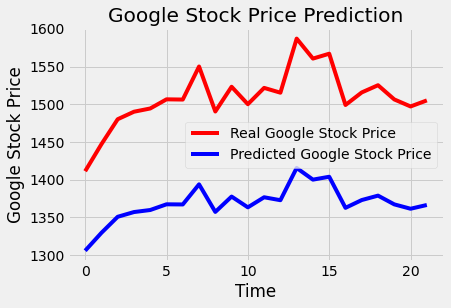

In [82]:
plt.plot(real_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [104]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas.util.testing import assert_frame_equal

In [105]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2020, 8, 30)
df = web.DataReader("WIT", 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,4.719001,4.625335,4.652096,4.665477,797800.0,4.211527
2012-01-04,4.683319,4.553970,4.665477,4.585192,1089000.0,4.139054
2012-01-05,4.589652,4.495986,4.558430,4.513827,1185200.0,4.074632
2012-01-06,4.553970,4.464764,4.495986,4.518287,1108400.0,4.078658
2012-01-09,4.598573,4.495986,4.549510,4.540589,1037000.0,4.098791
...,...,...,...,...,...,...
2020-08-24,4.280000,4.210000,4.260000,4.270000,691700.0,4.270000
2020-08-25,4.250000,4.200000,4.230000,4.230000,813300.0,4.230000
2020-08-26,4.260000,4.210000,4.250000,4.230000,585000.0,4.230000


[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 4.84623106 4.85347905 4.86217664
 4.87098575 4.8761151  4.88113294 4.88860395 4.89629797 4.90800626
 4.92272526 4.93320696 4.94168154 4.94725692 4.94747994 4.9469224
 4.94703391 4.94268512 4.93900537 4.93599466 4.93599466 4.93287245
 4.93075382 4.92807763 4.92250226 4.91770743 4.91079396 4.9068912
 4.89997773 4.89272974 4.88704284 4.88302857 4.86964766 4.85347905
 4.83876004 4.82526762 4.81088315 4.79705621 4.78289474 4.77419715
 4.76092775 4.74776984 4.73282783 4.71721677 4.70327832 4.69268509
 4.68053076 4.66402764 4.6427297  4.62187778 4.5985727  4.576828

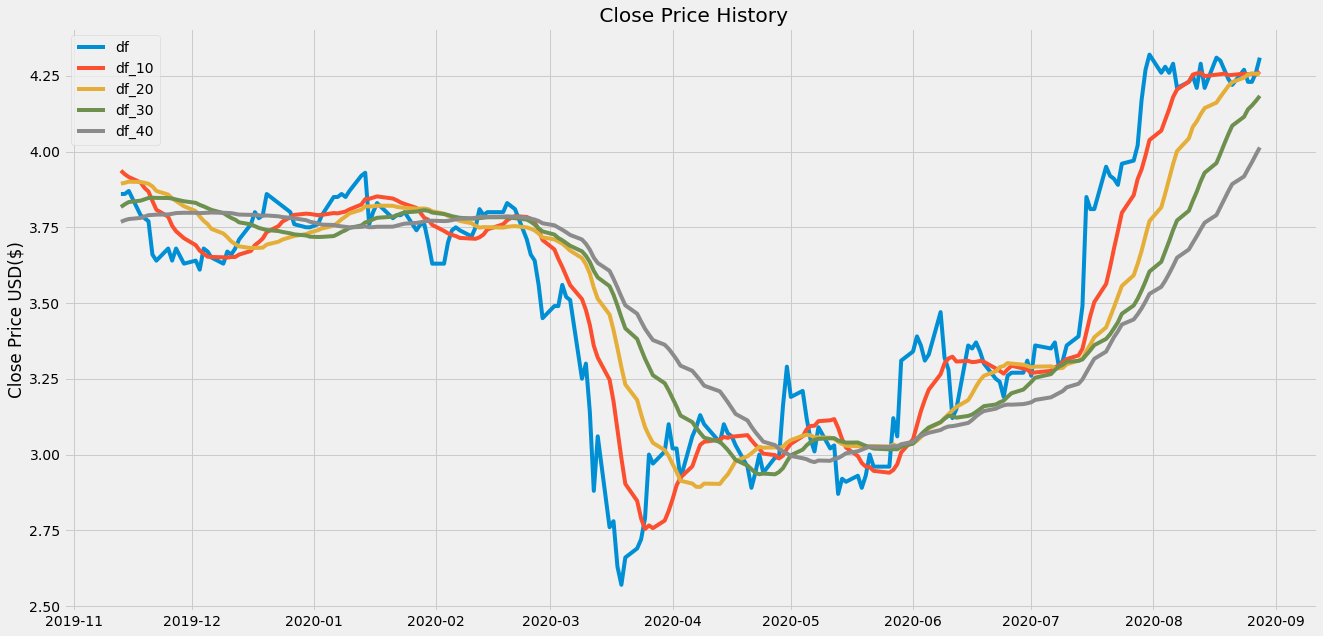

In [106]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()
print(df_40['Close'].head(200).values)

plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title(' Close Price History')

plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [107]:
data = df.filter(['Close'])
data.head()

,Close
Date,
2012-01-03,4.665477
2012-01-04,4.585192
2012-01-05,4.513827
2012-01-06,4.518287
2012-01-09,4.540589


In [108]:
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1744

In [109]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.46360116],
        [0.44583887],
        [0.43005018],
        ...,
        [0.36725664],
        [0.37389385],
        [0.38495574]]), (2179, 1))

In [110]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]

## Split the data into train and test
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))



[array([0.46360116, 0.44583887, 0.43005018, 0.43103698, 0.43597098,
       0.44090487, 0.46261436, 0.41722189, 0.4083408 , 0.43893138,
       0.45274647, 0.46261436, 0.50899363, 0.49912574, 0.50405963,
       0.51984832, 0.51590112, 0.51294083, 0.48925774, 0.50504643,
       0.51787472, 0.54057101, 0.56326719, 0.5514257 , 0.5514257 ,
       0.53366341, 0.5484653 , 0.54451821, 0.53859741, 0.52971632,
       0.53563701, 0.54254461, 0.54451821, 0.53465021, 0.5484653 ,
       0.5583333 , 0.5563597 , 0.52774272, 0.51590112, 0.51491443,
       0.52774272, 0.52280872, 0.50800683, 0.47642945, 0.48037665,
       0.50702003, 0.53070301, 0.52083512, 0.53859741, 0.53168981,
       0.52774272, 0.51195403, 0.51096723, 0.49419174, 0.50504643,
       0.48136345, 0.48333705, 0.48629734, 0.48925774, 0.47741625])]
[0.49912573704700147]

[array([0.46360116, 0.44583887, 0.43005018, 0.43103698, 0.43597098,
       0.44090487, 0.46261436, 0.41722189, 0.4083408 , 0.43893138,
       0.45274647, 0.46261436, 0.50

In [111]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1684, 60)

In [112]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1684, 60, 1)

In [113]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1684/1684 [==============================] - 10s 6ms/step - loss: 0.0031
Epoch 2/20
1684/1684 [==============================] - 10s 6ms/step - loss: 0.0012
Epoch 3/20
1684/1684 [==============================] - 10s 6ms/step - loss: 7.9552e-04
Epoch 4/20
1684/1684 [==============================] - 10s 6ms/step - loss: 6.7835e-04
Epoch 5/20
1684/1684 [==============================] - 11s 6ms/step - loss: 6.2704e-04
Epoch 6/20
1684/1684 [==============================] - 10s 6ms/step - loss: 6.4230e-04
Epoch 7/20
1684/1684 [==============================] - 10s 6ms/step - loss: 5.9781e-04
Epoch 8/20
1684/1684 [==============================] - 10s 6ms/step - loss: 5.9038e-04
Epoch 9/20
1684/1684 [==============================] - 11s 6ms/step - loss: 5.9675e-04
Epoch 10/20
1684/1684 [==============================] - 10s 6ms/step - loss: 5.6046e-04
Epoch 11/20
1684/1684 [==============================] - 10s 6ms/step - loss: 5.4381e-04
Epoch 12/20
1684/1684 [===============

In [116]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [117]:
x_test = np.array(x_test)
x_test

array([[0.61725665, 0.62831853, 0.61061944, ..., 0.5907079 , 0.59292034,
        0.58407079],
       [0.62831853, 0.61061944, 0.59513278, ..., 0.59292034, 0.58407079,
        0.57079647],
       [0.61061944, 0.59513278, 0.6084071 , ..., 0.58407079, 0.57079647,
        0.55309737],
       ...,
       [0.18141596, 0.17477874, 0.16371681, ..., 0.3650442 , 0.37610619,
        0.36725664],
       [0.17477874, 0.16371681, 0.16814158, ..., 0.37610619, 0.36725664,
        0.36725664],
       [0.16371681, 0.16814158, 0.19911506, ..., 0.36725664, 0.36725664,
        0.37389385]])

In [118]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [119]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [120]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(0.0033294947891323234, 0.05770177457524442)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


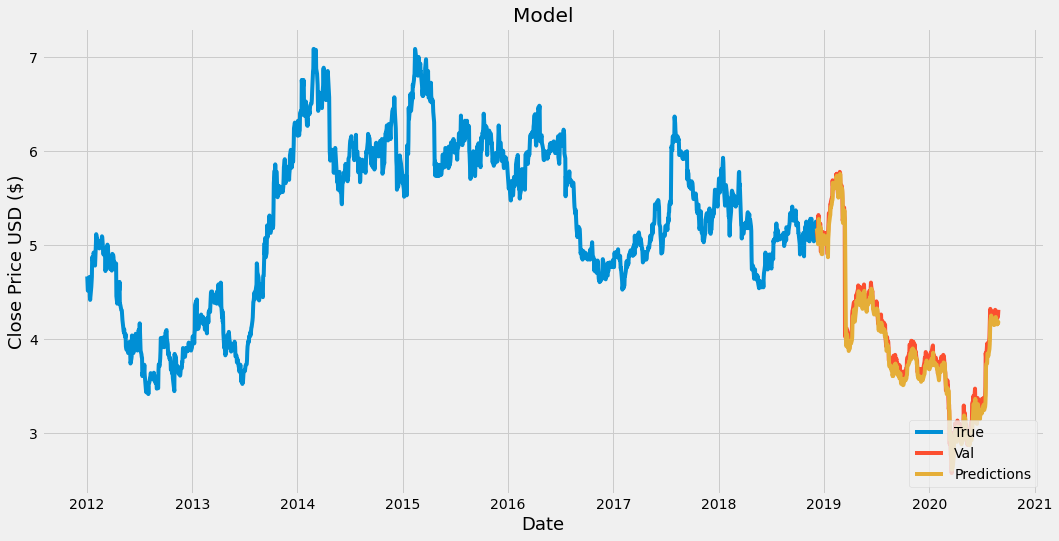

In [121]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [124]:
data=web.DataReader('WIT',data_source='yahoo',start='2012-01-01',end='2020-09-07')
new_data=data.filter(['Close'])
last_60_days=new_data[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_price=model.predict(X_test)
pred_price=scaler.inverse_transform(predicted_price)
print(pred_price)
data=web.DataReader('WIT',data_source='yahoo',start='2020-09-08',end='2020-09-08')
print(data['Close'])

[[4.2439213]]
Date
2020-09-08    4.28
2020-09-08    4.28
Name: Close, dtype: float64


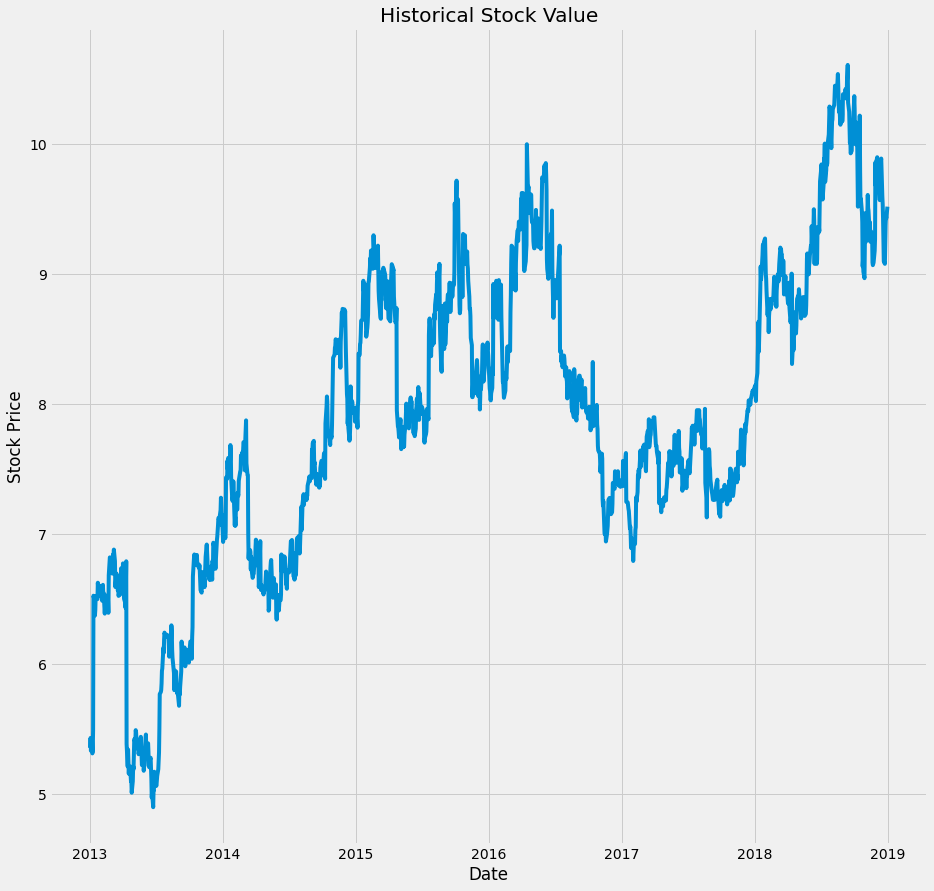

Epoch 1/15
45/45 [==============================] - 1s 16ms/step - loss: 0.0249
Epoch 2/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0080
Epoch 3/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0082
Epoch 4/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0077
Epoch 5/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0066
Epoch 6/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0069
Epoch 7/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0066
Epoch 8/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0061
Epoch 9/15
45/45 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 10/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0051
Epoch 11/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0062
Epoch 12/15
45/45 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 13/15
45/45 [==================

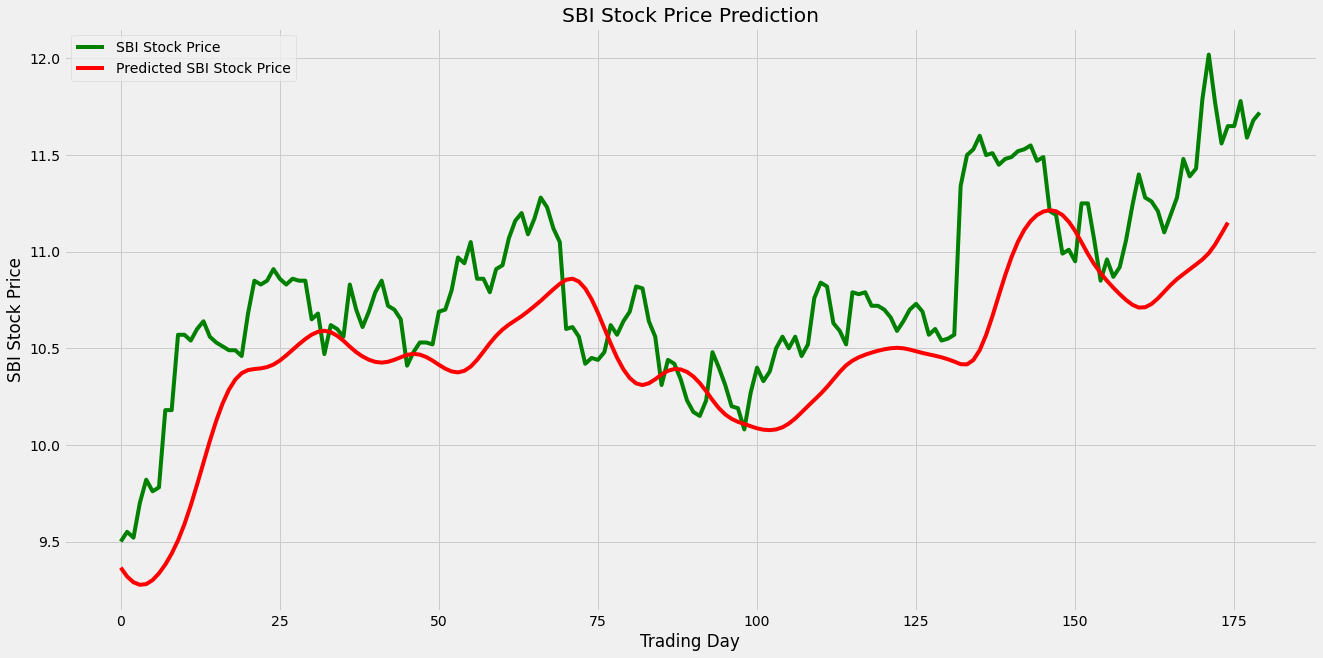

In [123]:
#Importing the libraries

import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas_datareader as web

#Setting start and end dates and fetching the historical data
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data =web.DataReader('INFY',data_source='yahoo',start=start,end=end)

#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)


#Fetching the test data and preprocessing
testdataframe = web.DataReader('INFY',data_source='yahoo',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Visualizing the prediction
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()